<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Trends" data-toc-modified-id="Trends-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Trends</a></span></li></ul></li></ul></div>

# Introduction

This notebook does some EDA on the given data.

# Libraries

In [1]:
from pathlib import Path
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Setup

Navigate to the root folder:

In [3]:
%cd ..

/tmp/trading


Setup the data directory and filename:

In [4]:
data_dir = Path("./data")
data_file = "bitmex_BTCUSD_candles_1m_price.csv"

Grab some metadata from the file name:

In [5]:
exchange, symbol, _, interval, _ = data_file.split("_")

# Data

Read and preview some of the data:

In [6]:
df = pd \
    .read_csv(data_dir/data_file, parse_dates=["Date"], index_col=["Date"]) \
    .sort_index(ascending=True)
df.head()

,Open,Close,High,Low,Trades,Volume
Date,,,,,,
2017-12-31 21:00:00+00:00,14185.5,14176.0,14187.0,14170.5,51,101296
2017-12-31 21:01:00+00:00,14176.0,14117.5,14176.0,14117.5,206,453469
2017-12-31 21:02:00+00:00,14117.5,14095.5,14142.5,14069.0,438,1857761
2017-12-31 21:03:00+00:00,14095.5,14116.5,14116.5,14060.0,224,794703
2017-12-31 21:04:00+00:00,14116.5,14086.5,14144.0,14086.5,201,574565


In [7]:
df.dtypes

Open      float64
Close     float64
High      float64
Low       float64
Trades      int64
Volume      int64
dtype: object

In [8]:
df.describe()

,Open,Close,High,Low,Trades,Volume
count,846664.000000,846664.000000,846664.000000,846664.000000,846664.000000,8.466640e+05
mean,7137.069943,7137.066620,7140.947279,7133.112672,375.306456,1.695974e+06
std,2673.097610,2673.090597,2676.179043,2669.926677,487.447902,3.041599e+06
min,3126.000000,3126.000000,3132.000000,3121.000000,0.000000,0.000000e+00
25%,5162.500000,5162.500000,5163.500000,5161.000000,93.000000,2.822618e+05
50%,6690.000000,6690.000000,6692.000000,6688.500000,235.000000,8.079605e+05
75%,8704.625000,8704.625000,8709.500000,8700.000000,467.000000,1.902515e+06
max,17412.000000,17412.000000,17422.000000,17328.500000,13058.000000,9.761558e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 846664 entries, 2017-12-31 21:00:00+00:00 to 2019-08-11 20:03:00+00:00
Data columns (total 6 columns):
Open      846664 non-null float64
Close     846664 non-null float64
High      846664 non-null float64
Low       846664 non-null float64
Trades    846664 non-null int64
Volume    846664 non-null int64
dtypes: float64(4), int64(2)
memory usage: 45.2 MB


# EDA

## Trends

Plot closing price:

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


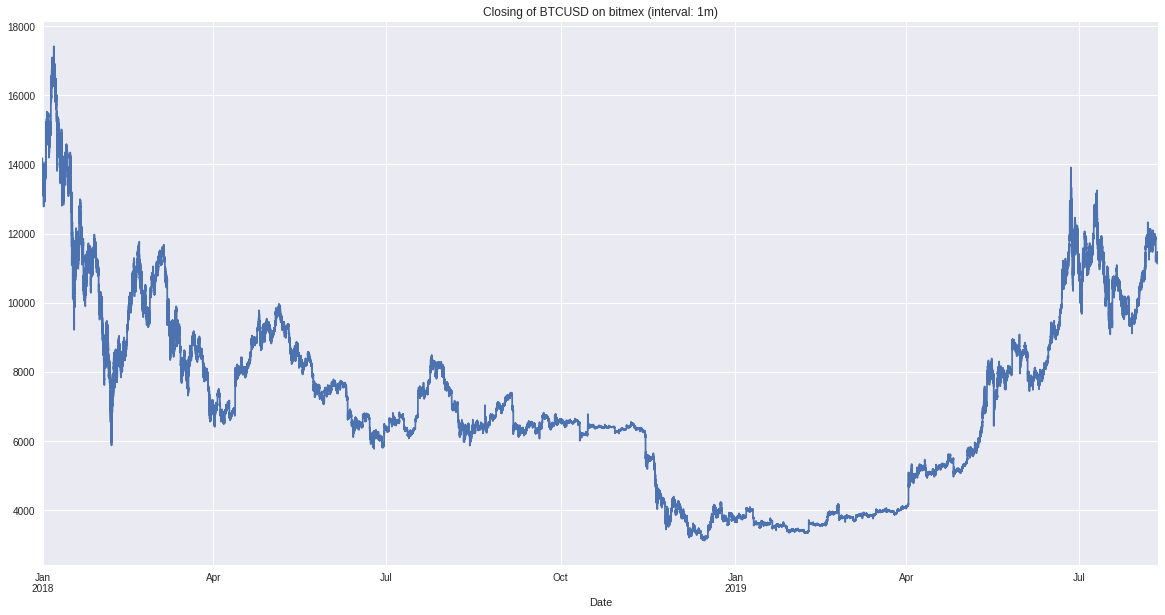

In [10]:
df["Close"].plot(figsize=(20, 10), title=f"Closing of {symbol} on {exchange} (interval: {interval})")

Plot 20 and 50 period SMA:

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


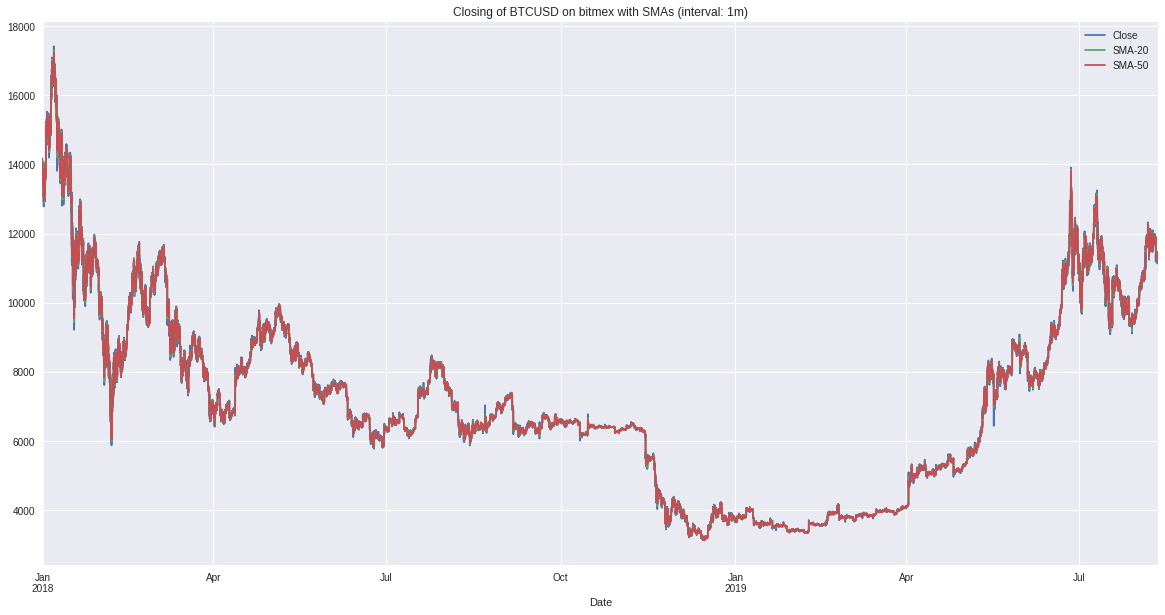

In [11]:
p1 = 20
p2 = 50

df[f"SMA-{p1}"] = df["Close"].rolling(p1).mean()
df[f"SMA-{p2}"] = df["Close"].rolling(p2).mean()

df[["Close", f"SMA-{p1}", f"SMA-{p2}"]] \
    .plot(figsize=(20, 10), title=f"Closing of {symbol} on {exchange} with SMAs (interval: {interval})")

Zoom closer:

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:407: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  s = level_values.to_series()
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:415: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  dindex = axis_index.to_series()
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


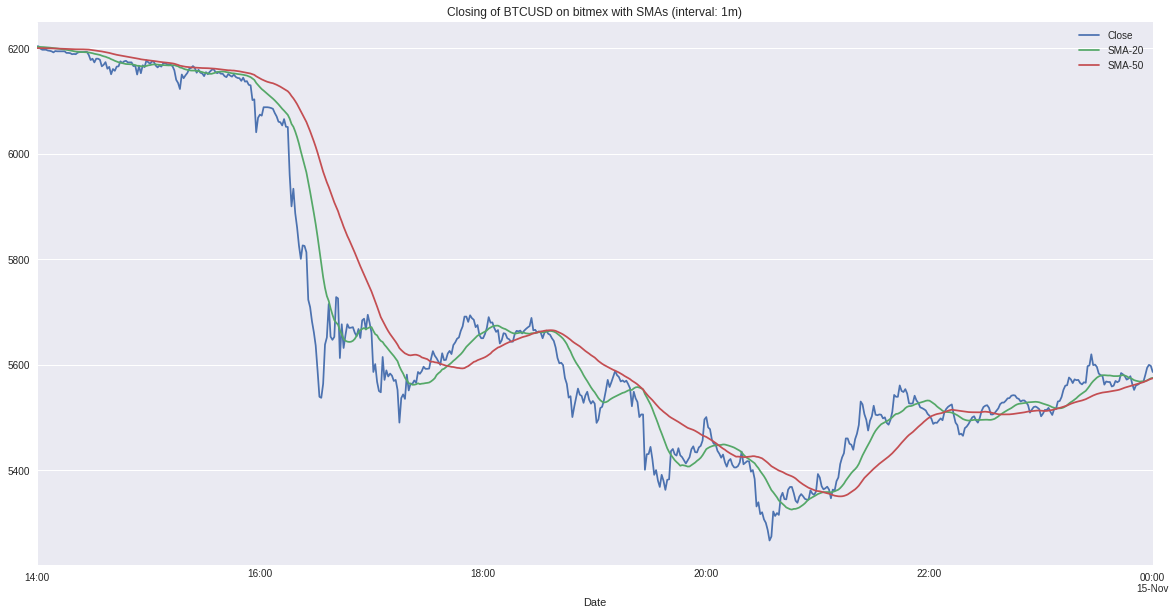

In [12]:
df[["Close", f"SMA-{p1}", f"SMA-{p2}"]] \
    .query("Date >= '2018-11-14 14:00:00' and Date <= '2018-11-15' " ) \
    .plot(figsize=(20, 10), title=f"Closing of {symbol} on {exchange} with SMAs (interval: {interval})")